<a href="https://colab.research.google.com/github/ChiThang-50Cent/credit-risk-prediction/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
!wget https://raw.githubusercontent.com/ChiThang-50Cent/credit-risk-prediction/main/credit_risk_dataset.csv

--2023-09-18 02:27:27--  https://raw.githubusercontent.com/ChiThang-50Cent/credit-risk-prediction/main/credit_risk_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1804682 (1.7M) [text/plain]
Saving to: ‘credit_risk_dataset.csv.1’

credit_risk_dataset 100%[===================>]   1.72M  --.-KB/s    in 0.06s   

2023-09-18 02:27:27 (28.2 MB/s) - ‘credit_risk_dataset.csv.1’ saved [1804682/1804682]



In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('./credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Exploratory Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

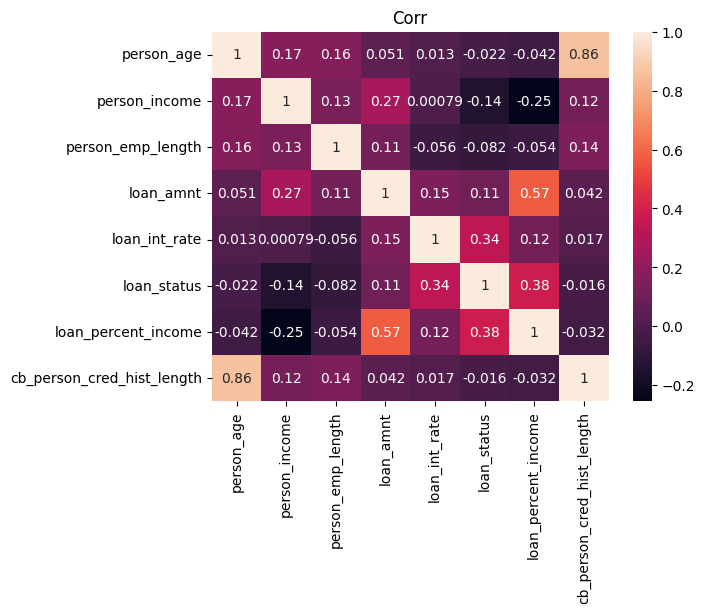

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Corr')
plt.show()

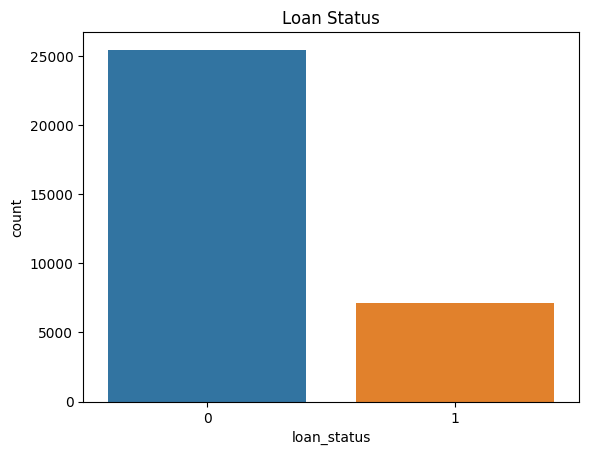

In [7]:
sns.countplot(x=df['loan_status'])
plt.title('Loan Status')
plt.show()

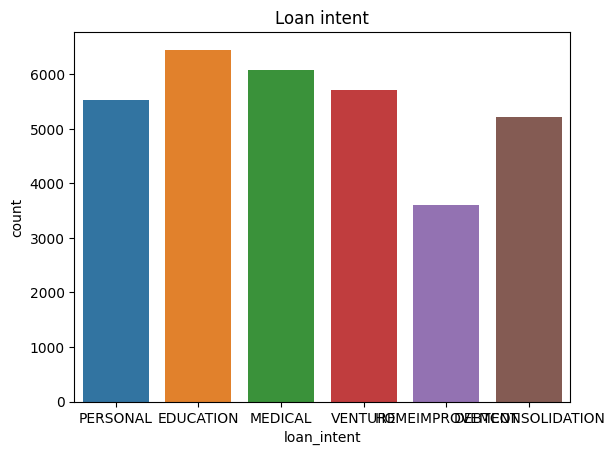

In [8]:
sns.countplot(x=df['loan_intent'])
plt.title('Loan intent')
plt.show()

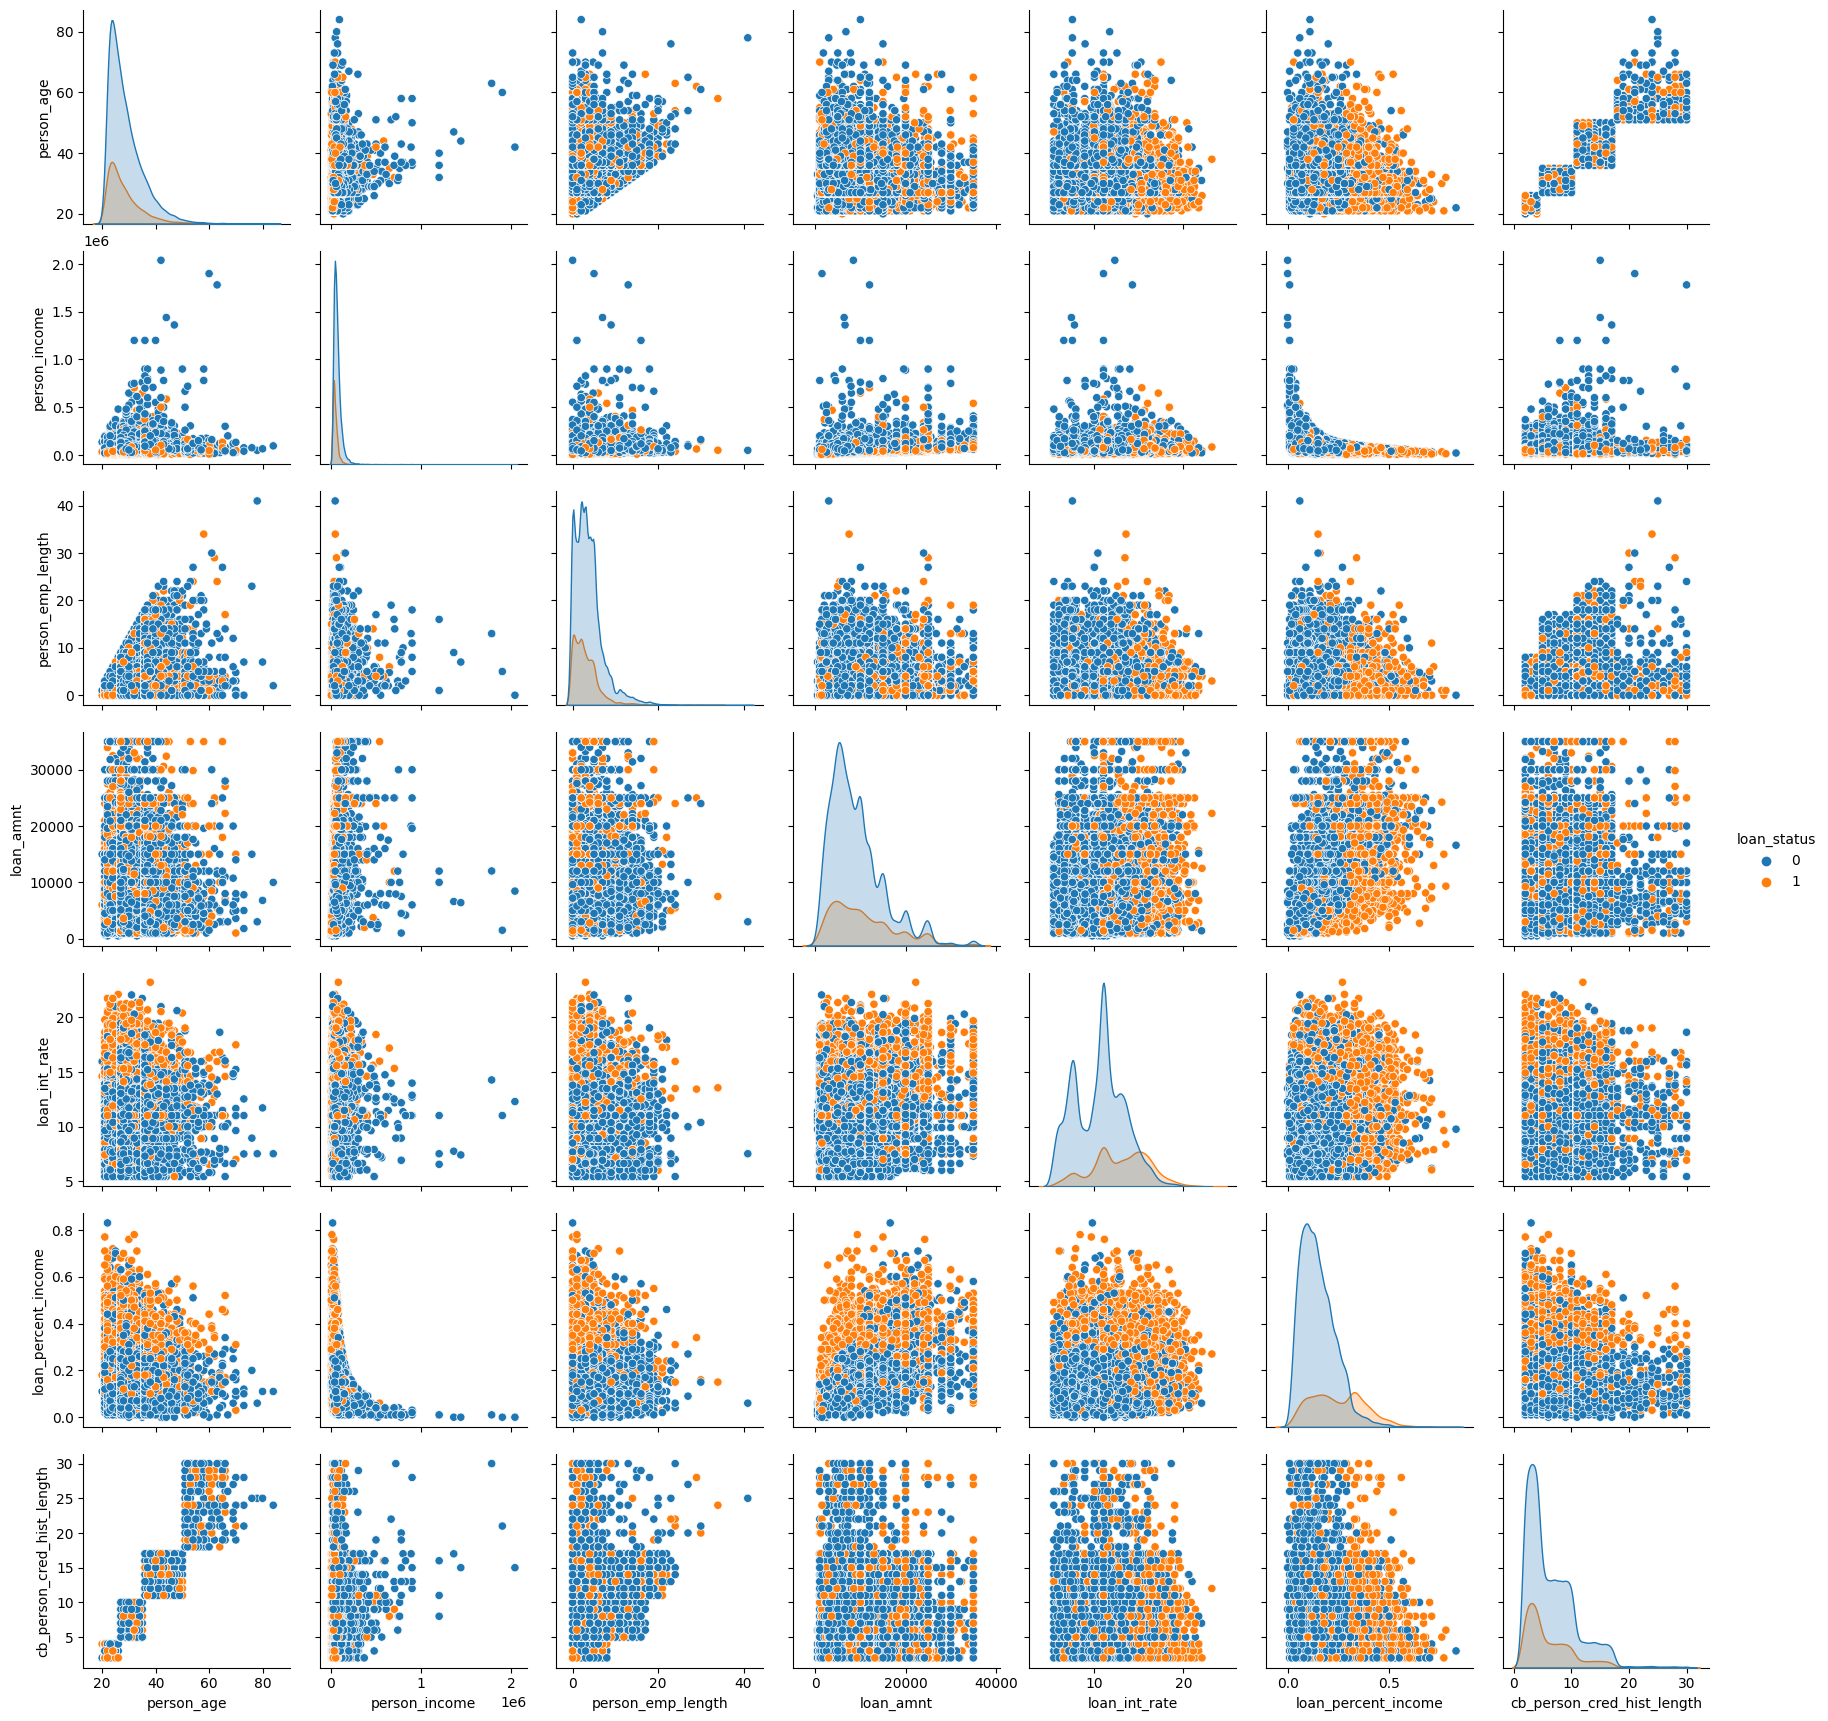

In [120]:
sns.pairplot(df, hue='loan_status')
plt.show()

# Data Preprocessing

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = df['loan_int_rate'].mean()
df.loc[df['person_emp_length'].isnull(), 'person_emp_length'] = df['person_emp_length'].mean()

In [12]:
df.isnull().sum().sum()

0

In [13]:
df = df[(df['person_age'] <= 90) & (df['person_age'] >= 18)]

In [14]:
df = df[df['person_emp_length'] <= df['person_age'] - 18]

In [15]:
y = df['loan_status']
X = df.drop('loan_status', axis=1)

In [16]:
X.reset_index(drop=True, inplace=True)
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
1,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
2,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2
3,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,0.45,N,3
4,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4


In [17]:
label_for_encoding = X.select_dtypes(exclude=np.number).columns
label_for_encoding

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [18]:
lb = LabelEncoder()

for label in label_for_encoding:
  X[label] = lb.fit_transform(X[label])

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X[0]

array([-0.55864705, -0.99262618, -1.2756319 , -0.77073006,  0.26902259,
        0.6456957 , -0.62797097,  0.58250389,  3.72962957, -0.47250027,
       -0.77895381])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape

((19659, 11), (4915, 11))

# Training

Dễ dàng thấy dữ liệu bị mất cân bằng

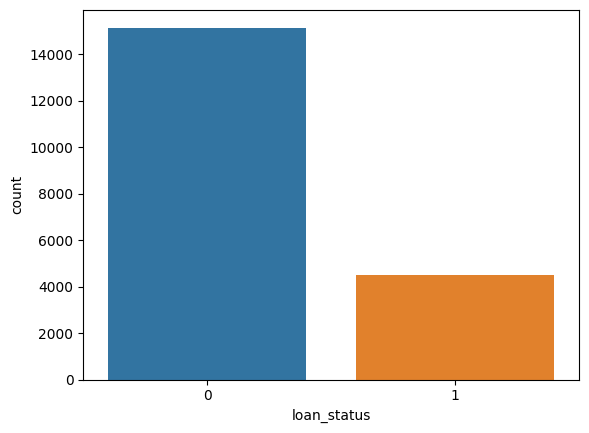

In [23]:
sns.countplot(x=y_train)
plt.show()

Sử dụng model RandomForest để xử lý việc mất cân bằng

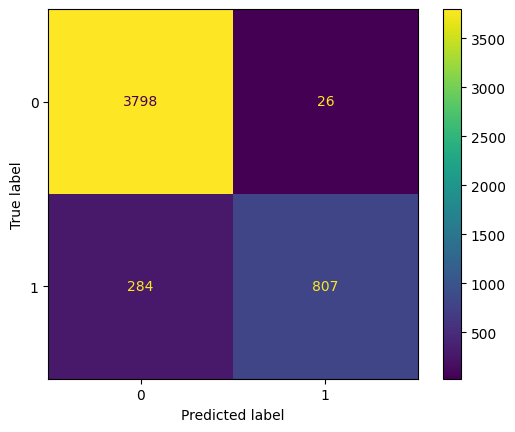

In [24]:
rf = RandomForestClassifier(n_estimators=200, max_features=5, min_samples_split=5)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rf.classes_)
disp.plot()
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3824
           1       0.97      0.74      0.84      1091

    accuracy                           0.94      4915
   macro avg       0.95      0.87      0.90      4915
weighted avg       0.94      0.94      0.93      4915



Tăng cường dữ liệu bằng SMOTE

In [26]:
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [27]:
X_resample.shape

(30288, 11)

Phân bố mới, đồng đều hơn

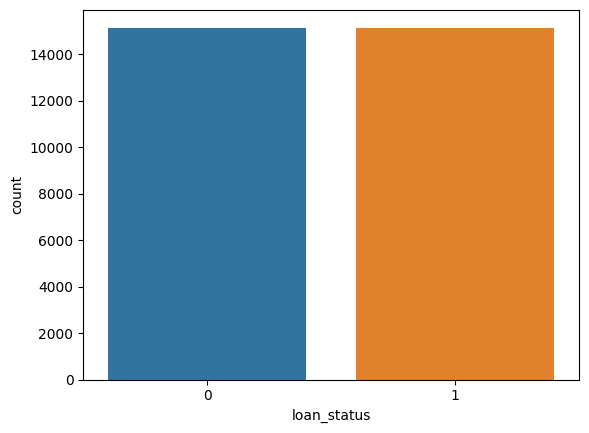

In [28]:
sns.countplot(x=y_resample)
plt.show()

Chạy lại Random Forest

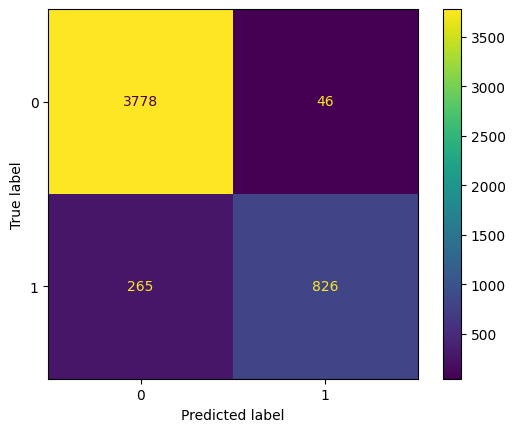

In [29]:
rf_smote = RandomForestClassifier(n_estimators=200, max_features=5, min_samples_split=5)
rf_smote.fit(X_resample, y_resample)

y_pred_smote = rf_smote.predict(X_test)

cm = confusion_matrix(y_test, y_pred_smote, labels=rf_smote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf_smote.classes_)
disp.plot()
plt.show()

In [30]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3824
           1       0.95      0.76      0.84      1091

    accuracy                           0.94      4915
   macro avg       0.94      0.87      0.90      4915
weighted avg       0.94      0.94      0.93      4915



Chạy thử Logistic Regression, kết quả không tốt cho lắm

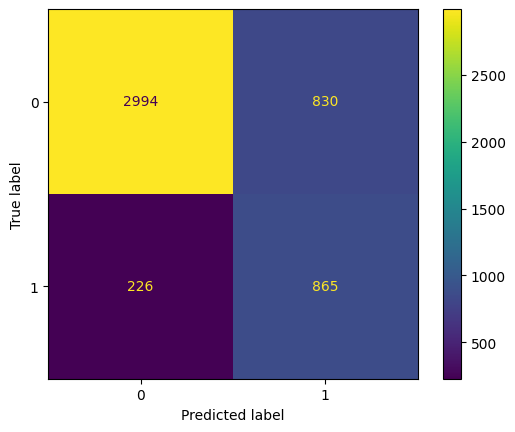

In [39]:
lr_smote = LogisticRegression()
lr_smote.fit(X_resample, y_resample)

y_pred_smote = lr_smote.predict(X_test)

cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [38]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      3824
           1       0.51      0.79      0.62      1091

    accuracy                           0.79      4915
   macro avg       0.72      0.79      0.74      4915
weighted avg       0.84      0.79      0.80      4915



Xây dựng mô hình DL, có cải thiện recall của label 1, nhưng tổng quan vẫn không tốt bằng RF

In [116]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, input_shape=(11,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [117]:
model.fit(X_resample, y_resample, epochs=100, batch_size=64, verbose=0)

154/154 [==============================] - 0s 772us/step


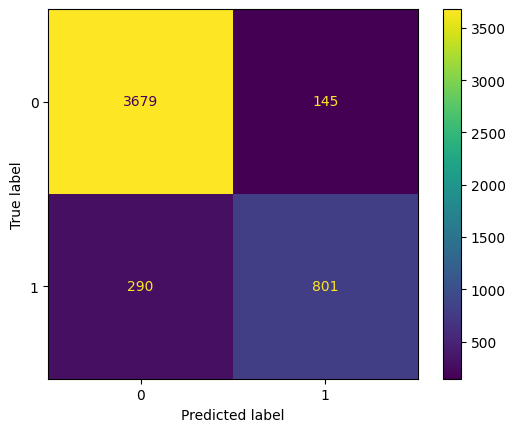

In [118]:
y_pred_dnn = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred_dnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [119]:
print(classification_report(y_test, y_pred_dnn))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3824
           1       0.85      0.73      0.79      1091

    accuracy                           0.91      4915
   macro avg       0.89      0.85      0.87      4915
weighted avg       0.91      0.91      0.91      4915

